In [1]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from road import Road

%matplotlib inline

In [2]:
road = Road(number_of_cars=30)
number_of_runs = 100
seconds_in_run = 60

road.place_cars()
for car in road.set_of_cars:
    print(car.car_coordinates)

speed_limit_list = []
positions_list = []
speeds_list = []

for _ in range(number_of_runs):
    speeds, positions = road.simulate_n_seconds(seconds_in_run)

    speed_limit_list.append(np.mean(speeds) + np.std(speeds))

    if _ == 0:
        positions_list = positions
        speeds_list.append(speeds)

positions_matrix_b = []
for sec_list in positions_list:
    sec_list = np.ndarray.flatten(np.array(sec_list))
    positions_matrix_b.append(sec_list)

positions_matrix_b = np.matrix(positions_matrix_b)
print(positions_matrix_b[0])
print(positions_matrix_b[1])
print(positions_matrix_b[2])
print(positions_matrix_b[3])
print(positions_matrix_b[4])
print(positions_matrix_b[5])

[957 958 959 960 961]
[924 925 926 927 928]
[891 892 893 894 895]
[858 859 860 861 862]
[825 826 827 828 829]
[792 793 794 795 796]
[759 760 761 762 763]
[726 727 728 729 730]
[693 694 695 696 697]
[660 661 662 663 664]
[627 628 629 630 631]
[594 595 596 597 598]
[561 562 563 564 565]
[528 529 530 531 532]
[495 496 497 498 499]
[462 463 464 465 466]
[429 430 431 432 433]
[396 397 398 399 400]
[363 364 365 366 367]
[330 331 332 333 334]
[297 298 299 300 301]
[264 265 266 267 268]
[231 232 233 234 235]
[198 199 200 201 202]
[165 166 167 168 169]
[132 133 134 135 136]
[ 99 100 101 102 103]
[66 67 68 69 70]
[33 34 35 36 37]
[0 1 2 3 4]
2 [893 894 895 896 897] 2
2 [897 898 899 900 901] 4
2 [903 904 905 906 907] 6
2 [907 908 909 910 911] 4
2 [913 914 915 916 917] 6
2 [921 922 923 924 925] 8
2 [931 932 933 934 935] 10
2 [943 944 945 946 947] 12
2 [957 958 959 960 961] 14
2 [969 970 971 972 973] 12
2 [983 984 985 986 987] 14
2 [999   0   1   2   3] 16
2 [17 18 19 20 21] 18
2 [37 38 39 40 41] 2

In [3]:
sec_2_positions = np.array([[961, 962, 963, 964, 965],
        [928, 929, 930, 931, 932],
        [895, 896, 897, 898, 899],
        [862, 863, 864, 865, 866],
        [829, 830, 831, 832, 833],
        [796, 797, 798, 799, 800],
        [763, 764, 765, 766, 767],
        [730, 731, 732, 733, 734],
        [697, 698, 699, 700, 701],
        [664, 665, 666, 667, 668],
        [631, 632, 633, 634, 635],
        [598, 599, 600, 601, 602],
        [565, 566, 567, 568, 569],
        [532, 533, 534, 535, 536],
        [499, 500, 501, 502, 503],
        [466, 467, 468, 469, 470],
        [433, 434, 435, 436, 437],
        [400, 401, 402, 403, 404],
        [367, 368, 369, 370, 371],
        [334, 335, 336, 337, 338],
        [301, 302, 303, 304, 305],
        [268, 269, 270, 271, 272],
        [235, 236, 237, 238, 239],
        [202, 203, 204, 205, 206],
        [169, 170, 171, 172, 173],
        [136, 137, 138, 139, 140],
        [103, 104, 105, 106, 107],
        [ 70,  71,  72,  73,  74],
        [ 37,  38,  39,  40,  41],
        [  4,   5,   6,   7,   8]])
sec_2_positions = np.ndarray.flatten(sec_2_positions)
sec_1_positions = sec_2_positions[:] - 2
sec_3_positions = sec_2_positions[:] + 2

In [4]:
position_matrix = []
position_matrix.append(sec_1_positions)
position_matrix.append(sec_2_positions)
position_matrix.append(sec_3_positions)
# position_matrix = [item for sublist in position_matrix for item in sublist]
position_matrix = np.matrix(position_matrix)
print(position_matrix)

[[959 960 961 962 963 926 927 928 929 930 893 894 895 896 897 860 861 862
  863 864 827 828 829 830 831 794 795 796 797 798 761 762 763 764 765 728
  729 730 731 732 695 696 697 698 699 662 663 664 665 666 629 630 631 632
  633 596 597 598 599 600 563 564 565 566 567 530 531 532 533 534 497 498
  499 500 501 464 465 466 467 468 431 432 433 434 435 398 399 400 401 402
  365 366 367 368 369 332 333 334 335 336 299 300 301 302 303 266 267 268
  269 270 233 234 235 236 237 200 201 202 203 204 167 168 169 170 171 134
  135 136 137 138 101 102 103 104 105  68  69  70  71  72  35  36  37  38
   39   2   3   4   5   6]
 [961 962 963 964 965 928 929 930 931 932 895 896 897 898 899 862 863 864
  865 866 829 830 831 832 833 796 797 798 799 800 763 764 765 766 767 730
  731 732 733 734 697 698 699 700 701 664 665 666 667 668 631 632 633 634
  635 598 599 600 601 602 565 566 567 568 569 532 533 534 535 536 499 500
  501 502 503 466 467 468 469 470 433 434 435 436 437 400 401 402 403 404
  367 368 3

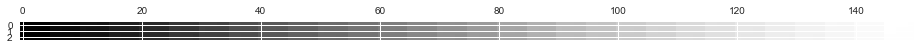

In [5]:
plt.matshow(position_matrix)
plt.show()

In [6]:
# from matplotlib.patches import Rectangle


# x = position_matrix
# # y_list = []
# # for number in range(0,61):
# #     y_list.append([number]*150)
# # Y = np.ndarray.flatten(np.array(y_list))

# y = [1]*150 + [2]*150 + [3]*150
# dx = [1]*150*3

# fig = plt.figure()
# ax = fig.add_subplot(111, aspect='equal')

# for x, y, h in zip(x, y, dx):
#     ax.add_artist(Rectangle(xy=(x, y), color='black', width=h, height=h))      # Gives a square of area h*h

# axes = plt.gca()
# axes.set_xlim([0,150])
# axes.set_ylim([0,10])
# # plt.plot((10, 10), (0, 120), 'red-')

# plt.show()

<class 'numpy.matrixlib.defmatrix.matrix'> <class 'list'>
1


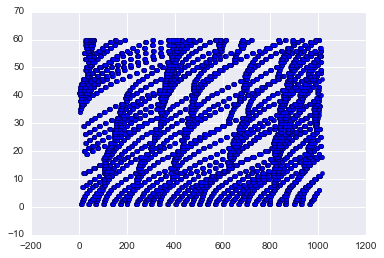

In [8]:
x = positions_matrix_b
y = [[n] * 150 for n in range(1, 61)]
print(type(x), type(y))
x = np.ndarray.flatten(positions_matrix_b)
print(len(x))
plt.scatter(x, y)

In [9]:
speed_data = []
position_data = []

road2 = Road(10)
road2.place_cars()

for _ in range(60):
    temp_list = []

    for index, car in enumerate(road2.set_of_cars):

        td = road2.set_tail_distance(car, road2.set_of_cars[index-1])
        car.set_new_speed(road2.set_of_cars[index-1], td)
        car.change_position()
        road2.check_position(car, road2.set_of_cars[index-1])
        road2.check_end_of_lap(car)
        if index == 2 or index == 1:
            print(index, car.car_coordinates, car.speed)

        if _ > 60/2:
            speed_data.append(car.speed)

        temp_list.append(car.car_coordinates)

    position_data.append(temp_list)


1 [802 803 804 805 806] 2
2 [702 703 704 705 706] 2
1 [802 803 804 805 806] 0
2 [706 707 708 709 710] 4
1 [804 805 806 807 808] 2
2 [712 713 714 715 716] 6
1 [808 809 810 811 812] 4
2 [716 717 718 719 720] 4
1 [814 815 816 817 818] 6
2 [722 723 724 725 726] 6
1 [822 823 824 825 826] 8
2 [730 731 732 733 734] 8
1 [832 833 834 835 836] 10
2 [740 741 742 743 744] 10
1 [844 845 846 847 848] 12
2 [752 753 754 755 756] 12
1 [858 859 860 861 862] 14
2 [766 767 768 769 770] 14
1 [874 875 876 877 878] 16
2 [782 783 784 785 786] 16
1 [892 893 894 895 896] 18
2 [800 801 802 803 804] 18
1 [912 913 914 915 916] 20
2 [820 821 822 823 824] 20
1 [934 935 936 937 938] 22
2 [842 843 844 845 846] 22
1 [958 959 960 961 962] 24
2 [866 867 868 869 870] 24
1 [984 985 986 987 988] 26
2 [892 893 894 895 896] 26
1 [12 13 14 15 16] 28
2 [920 921 922 923 924] 28
1 [42 43 44 45 46] 30
2 [950 951 952 953 954] 30
1 [74 75 76 77 78] 32
2 [982 983 984 985 986] 32
1 [107 108 109 110 111] 33
2 [15 16 17 18 19] 33
1 [140